In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from imm import *
from simple_kalman import *
from bayes import *

2024-08-26 12:29:07.256001: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-26 12:29:07.309576: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-26 12:29:07.310839: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-26 12:29:08.324342: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# load dataset
ds_2d = load_dataset("/home/pbr-student/personal/thesis/test/PedestrianTrajectoryPrediction/datasets/test_dataset_odom", batch_size=32, pos_dim=2)
ds_3d = load_dataset("/home/pbr-student/personal/thesis/test/PedestrianTrajectoryPrediction/datasets/test_dataset_odom", batch_size=32, pos_dim=3)

Instructions for updating:
Use `tf.data.Dataset.load(...)` instead.


[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 16053318953697717525
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 16053318953697717525
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing 

In [3]:
model = EKF_CT2(pos_dim=2)

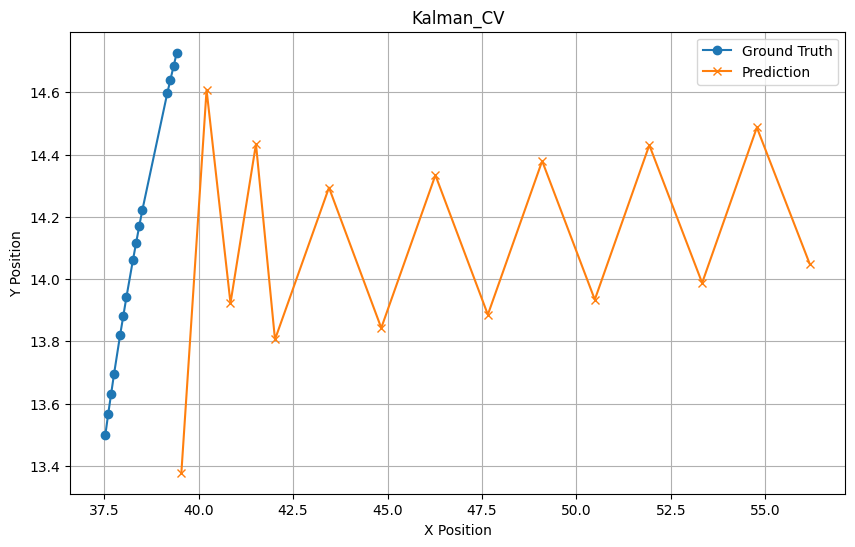

In [6]:
index = 1
predictions = model.predict(ds_2d[0][index:])
model.plot_predictions(ds_2d[0][index:], predictions, sample_index=0)

In [44]:
def calculate_minADE_(ground_truth, predictions, dim):
        print(ground_truth.shape)
        predicted_positions = predictions[:, :, :dim]
        print(predicted_positions.shape)
        displacement_errors = np.linalg.norm(ground_truth - predicted_positions, axis=2)
        minADE = np.min(np.mean(displacement_errors, axis=1))
        return minADE

In [75]:
def calculate_meanADE(ground_truth, predictions, dim):
        predicted_positions = predictions[:, :, :dim]
        displacement_errors = np.linalg.norm(ground_truth - predicted_positions, axis=2)
        ADE = np.mean(np.mean(displacement_errors, axis=1))
        return ADE

def calculate_meanFDE(ground_truth, predictions, dim):
        predicted_positions = predictions[:, :, :dim]
        final_displacement_errors = np.linalg.norm(ground_truth[:, -1] - predicted_positions[:, -1], axis=1)
        FDE = np.mean(final_displacement_errors)
        return FDE

In [78]:
calculate_meanFDE(ds[1], predictions, dim=3)

0.4109990684549325